In [1]:
from vectorhash import build_vectorhash_architecture
import torch
import torchvision
from torchvision import transforms
from vectorhash_functions import space_filling_curve
import matplotlib.pyplot as plt
from data_utils import prepare_data
from smoothing import SoftmaxSmoothing

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Lambda(lambda x: x.flatten())]
)

mnist = torchvision.datasets.MNIST(
    root="data", train=True, download=True, transform=transform
)

vhash = build_vectorhash_architecture(
    shapes=[(3,3), (5,5), (7,7)],
    N_h=1000,
    input_size=784,
    initalization_method="by_scaling",
    W_gh_var=1,
    percent_nonzero_relu=0.5,
    sparse_initialization=0.1,
    smoothing=SoftmaxSmoothing(T=1e-6),
    device=torch.device("cpu"),
    hippocampal_sensory_layer_type="iterative_pseudoinverse",
    hidden_layer_factor=1,
    stationary=True,
    epsilon_hs=0.1,
    epsilon_sh=0.1,
)

num_imgs = 2000

/Users/Ile-Maurice/Library/Python/3.10/lib/python/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


by_scaling
module shapes:  [(3, 3), (5, 5), (7, 7)]
N_g     :  83
N_patts :  11025
N_h     :  1000


In [3]:
mnist_data, noisy_mnist_data =prepare_data(mnist, num_imgs=num_imgs, preprocess_sensory=True, noise_level="none", across_dataset=False)

# velocities = space_filling_curve([[3,3], [5,5], [7,7]])

# vhash.learn_path(observations=mnist_data, velocities=velocities[:num_imgs])
# recalled_imgs = vhash.recall(noisy_mnist_data)
# recalled_imgs = recalled_imgs.reshape(-1, 1, 28, 28)

# for i in range(num_imgs):
#     recalled_img = recalled_imgs[i].squeeze().detach().numpy()
#     recalled_img = recalled_img.reshape(28, 28)
#     plt.imshow(recalled_img, cmap="gray")
#     plt.show()
    

/Users/Ile-Maurice/Library/Python/3.10/lib/python/site-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [4]:
from test_utils import dynamics_patts, capacity_test
import numpy as np
import torch
sbook = torch.randn((2000, 784), dtype=torch.float32)
sbook = torch.sign(sbook)


relu=[False,True]


err_h_l2_results = np.zeros(
    (
        len(relu),
        len([100, 400, 600, 800, 900, 1000, 1100, 1200, 1300, 1400, 1700])
    ),
)
err_s_l2_results = np.zeros(
    (
        len(relu),
        len([100, 400, 600, 800, 900, 1000, 1100, 1200, 1300, 1400, 1700])
    ),
)
err_s_l1_results = np.zeros(
    (
        len(relu),
        len([100, 400, 600, 800, 900, 1000, 1100, 1200, 1300, 1400, 1700])
    ),
)


Npatts_list = [100, 400, 600, 800, 900, 1000, 1100, 1200, 1300, 1400, 1700]
for i, relus in enumerate(relu):
    errs2, errh, errs = capacity_test(
        sbook=sbook,
        Npatts_list=Npatts_list,
        nruns=1,
        device=torch.device("cpu"),
        sign_output=True,
        shapes=[(3,3), (5,5), (7,7)],
        N_h=1000,
        input_size=784,
        initalization_method="by_scaling",
        W_gh_var=1,
        percent_nonzero_relu=0.7,
        sparse_initialization=0.1,
        smoothing_method=SoftmaxSmoothing(T=1e-6),
        hippocampal_sensory_layer_type="iterative_pseudoinverse",
        hidden_layer_factor=1,
        stationary=True,
        epsilon_hs=0.1,
        epsilon_sh=0.1,
        relu=relus,
    )
    err_h_l2_results[i] = errh.reshape(-1)
    err_s_l2_results[i] = errs2.reshape(-1)
    err_s_l1_results[i] = errs.reshape(-1)

by_scaling
module shapes:  [(3, 3), (5, 5), (7, 7)]
N_g     :  83
N_patts :  11025
N_h     :  1000


  9%|▉         | 1/11 [00:03<00:37,  3.71s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.]])


 18%|█▊        | 2/11 [00:19<01:39, 11.06s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


 27%|██▋       | 3/11 [00:47<02:30, 18.78s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


100%|██████████| 800/800 [00:25<00:00, 31.88it/s]


tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


 45%|████▌     | 5/11 [01:43<02:27, 24.55s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


 55%|█████▍    | 6/11 [02:17<02:18, 27.76s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


 64%|██████▎   | 7/11 [02:54<02:02, 30.71s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


 73%|███████▎  | 8/11 [03:30<01:37, 32.37s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


 82%|████████▏ | 9/11 [04:13<01:11, 35.78s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


 91%|█████████ | 10/11 [04:56<00:38, 38.09s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


100%|██████████| 11/11 [05:49<00:00, 31.78s/it]


tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
by_scaling
module shapes:  [(3, 3), (5, 5), (7, 7)]
N_g     :  83
N_patts :  11025
N_h     :  1000


  9%|▉         | 1/11 [00:02<00:29,  2.95s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.]])


 18%|█▊        | 2/11 [00:15<01:19,  8.84s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


 27%|██▋       | 3/11 [00:36<01:52, 14.08s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


 36%|███▋      | 4/11 [01:00<02:07, 18.23s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


 45%|████▌     | 5/11 [01:33<02:20, 23.39s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


 55%|█████▍    | 6/11 [02:04<02:09, 25.86s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.]])


 64%|██████▎   | 7/11 [02:44<02:02, 30.56s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


 73%|███████▎  | 8/11 [03:21<01:37, 32.61s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


 82%|████████▏ | 9/11 [04:22<01:23, 41.50s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


 91%|█████████ | 10/11 [05:03<00:41, 41.54s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


100%|██████████| 11/11 [05:59<00:00, 32.69s/it]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


/var/folders/q_/hxdspxw938n3_89qddxh_2fm0000gp/T/ipykernel_13832/3071076440.py:8: RuntimeWarning: divide by zero encountered in log2
  S = -a * np.log2(a) - b * np.log2(b)


Text(0.5, 1.0, 'MI per inp bit vs num patts (N_h=1000, sparsity=0.1)')

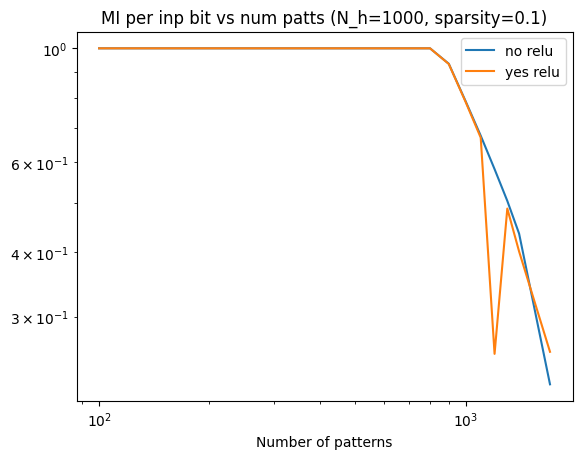

In [5]:


for i, relus in enumerate(relu):
        normlizd_l1 = err_s_l1_results[i]
        m = 1 - (2 * normlizd_l1)
        a = (1 + m) / 2
        b = (1 - m) / 2
        a = torch.abs(torch.tensor(a))
        b = torch.abs(torch.tensor(b)).cpu()
        S = -a * np.log2(a) - b * np.log2(b)
        S = np.where(m == 1, np.zeros_like(S), S)
        MI = 1 - S

        label = "yes relu" if relus else "no relu"
        plt.plot(Npatts_list,MI, label=label)
x = np.arange(len(Npatts_list))
plt.xticks(x, Npatts_list)
plt.xlabel("Number of patterns")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.title(
    f"MI per inp bit vs num patts (N_h=1000, sparsity=0.1)"
)
